# Menu Item Analysis and Revenue Optimization

### Problem to be solved -
To analyse a dataset of a restaurant's menu items and identify which items are
most popular among customers. Additionally,use this analysis to optimise the
restaurant's revenue by recommending changes to the menu

#### Dataset-description
● item_id: A unique ID for each menu item

● item_name: The name of the menu item

● item_description: A brief description of the menu item

● item_type: The type of menu item (appetiser, entree, dessert, etc.)

● item_price: The price of the menu item

● ingredients: A list of ingredients used in the menu item

● calories: The number of calories in the menu item

● rating: The average customer rating of the menu item (on a scale of 1 to 5)

● sales_count: The number of times the menu item has been sold in the past quarter

● cost_per_item: The cost of producing each menu item

## Part-1 - Data manipulation and wrangling

In [247]:
# importing library
import pandas as pd

In [248]:
# importing data
menu_df = pd.read_csv("menu_dataset.csv")

In [249]:
menu_df.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"['noodles', 'rice', 'beef', 'pork']",727,3.06,8,9.02
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"['pork', 'vegetables', 'fish', 'beef']",412,1.69,90,6.02
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"['shrimp', 'bread', 'rice', 'noodles']",358,2.89,26,4.44
3,4,vegetables beef dessert,delicious dessert,dessert,13.77,"['vegetables', 'beef']",355,2.50,5,6.59
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"['fish', 'pork', 'noodles']",117,3.49,22,8.86


In [250]:
menu_df.tail()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item
995,996,chicken tofu fish bread drink,healthy drink,drink,11.40,"['chicken', 'tofu', 'fish', 'bread']",822,1.56,21,2.65
996,997,fish pork shrimp drink,delicious drink,drink,7.32,"['fish', 'pork', 'shrimp']",290,1.00,40,2.62
997,998,shrimp tofu rice dessert,delicious dessert,dessert,16.10,"['shrimp', 'tofu', 'rice']",684,3.15,48,7.19
998,999,pork appetizer,tasty appetizer,appetizer,5.26,['pork'],992,4.48,49,1.85
999,1000,rice entree,healthy entree,entree,18.39,['rice'],502,4.62,36,9.44


In [251]:
menu_df.shape

(1000, 10)

In [252]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item_id           1000 non-null   int64  
 1   item_name         1000 non-null   object 
 2   item_description  1000 non-null   object 
 3   item_type         1000 non-null   object 
 4   item_price        1000 non-null   float64
 5   ingredients       1000 non-null   object 
 6   calories          1000 non-null   int64  
 7   rating            1000 non-null   float64
 8   sales_count       1000 non-null   int64  
 9   cost_per_item     1000 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [253]:
menu_df.describe()

,item_id,item_price,calories,rating,sales_count,cost_per_item
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,12.676030,569.597000,2.977620,48.857000,5.145420
std,288.819436,4.364173,259.225671,1.143607,29.864367,2.374308
min,1.000000,5.010000,101.000000,1.000000,0.000000,1.120000
25%,250.750000,8.837500,344.500000,2.010000,23.000000,3.250000
50%,500.500000,12.810000,579.000000,2.935000,48.000000,4.780000
75%,750.250000,16.452500,799.250000,3.950000,76.000000,6.782500
max,1000.000000,19.990000,997.000000,5.000000,100.000000,11.710000


In [254]:
# checking null_values
menu_df.isna().sum()

item_id             0
item_name           0
item_description    0
item_type           0
item_price          0
ingredients         0
calories            0
rating              0
sales_count         0
cost_per_item       0
dtype: int64

In [255]:
# checking unique_items
menu_df['item_name'].nunique()

716

In [256]:
menu_df['item_name'].value_counts()

pork appetizer                   12
vegetables dessert               12
fish appetizer                   11
bread dessert                    10
beef entree                      10
                                 ..
noodles rice bread fish drink     1
chicken bread tofu appetizer      1
shrimp bread noodles dessert      1
beef pork entree                  1
shrimp tofu rice dessert          1
Name: item_name, Length: 716, dtype: int64

In [257]:
menu_df['item_description'].nunique()

24

In [258]:
menu_df['item_description'].value_counts()

delicious dessert           57
hearty dessert              54
tasty dessert               51
satisfying appetizer        50
healthy entree              47
mouth-watering entree       46
healthy dessert             45
healthy drink               43
hearty entree               43
healthy appetizer           43
satisfying drink            43
tasty entree                41
mouth-watering drink        41
delicious drink             41
mouth-watering appetizer    41
tasty appetizer             38
hearty appetizer            38
mouth-watering dessert      38
hearty drink                37
delicious entree            35
tasty drink                 35
satisfying dessert          34
satisfying entree           31
delicious appetizer         28
Name: item_description, dtype: int64

In [259]:
menu_df['item_type'].nunique()

4

In [260]:
menu_df['item_type'].value_counts()

dessert      279
entree       243
drink        240
appetizer    238
Name: item_type, dtype: int64

### Performing One-Hot encoding to convert categorical column to numeric

In [261]:
# One hot encoding
new_menu_df = pd.get_dummies(menu_df, columns=["item_name","item_description","item_type"])

In [262]:
new_menu_df

,item_id,item_price,ingredients,calories,rating,sales_count,cost_per_item,item_name_beef appetizer,item_name_beef bread appetizer,item_name_beef bread dessert,...,item_description_satisfying drink,item_description_satisfying entree,item_description_tasty appetizer,item_description_tasty dessert,item_description_tasty drink,item_description_tasty entree,item_type_appetizer,item_type_dessert,item_type_drink,item_type_entree
0,1,19.15,"['noodles', 'rice', 'beef', 'pork']",727,3.06,8,9.02,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,17.69,"['pork', 'vegetables', 'fish', 'beef']",412,1.69,90,6.02,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,18.68,"['shrimp', 'bread', 'rice', 'noodles']",358,2.89,26,4.44,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,13.77,"['vegetables', 'beef']",355,2.50,5,6.59,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,18.80,"['fish', 'pork', 'noodles']",117,3.49,22,8.86,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,11.40,"['chicken', 'tofu', 'fish', 'bread']",822,1.56,21,2.65,0,0,0,...,0,0,0,0,0,0,0,0,1,0
996,997,7.32,"['fish', 'pork', 'shrimp']",290,1.00,40,2.62,0,0,0,...,0,0,0,0,0,0,0,0,1,0
997,998,16.10,"['shrimp', 'tofu', 'rice']",684,3.15,48,7.19,0,0,0,...,0,0,0,0,0,0,0,1,0,0
998,999,5.26,['pork'],992,4.48,49,1.85,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [263]:
# function to convert string to list
def convert_string_to_list(str):
  return eval(str)

In [264]:
# applying function to convert ingredients string to a list of strings
new_menu_df.loc[~new_menu_df['ingredients'].isna(),'ingredients']=new_menu_df.loc[~new_menu_df['ingredients'].isna(),'ingredients'].apply(convert_string_to_list)

In [265]:
# one hot encoding for ingredients
new_menu_df = new_menu_df.drop('ingredients', 1).join(new_menu_df.ingredients.str.join('|').str.get_dummies())
new_menu_df

C:\Users\deeshu.pandit\AppData\Local\Temp\ipykernel_15480\3808051301.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_menu_df = new_menu_df.drop('ingredients', 1).join(new_menu_df.ingredients.str.join('|').str.get_dummies())


,item_id,item_price,calories,rating,sales_count,cost_per_item,item_name_beef appetizer,item_name_beef bread appetizer,item_name_beef bread dessert,item_name_beef bread fish chicken appetizer,...,beef,bread,chicken,fish,noodles,pork,rice,shrimp,tofu,vegetables
0,1,19.15,727,3.06,8,9.02,0,0,0,0,...,1,0,0,0,1,1,1,0,0,0
1,2,17.69,412,1.69,90,6.02,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,3,18.68,358,2.89,26,4.44,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
3,4,13.77,355,2.50,5,6.59,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,18.80,117,3.49,22,8.86,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,11.40,822,1.56,21,2.65,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
996,997,7.32,290,1.00,40,2.62,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
997,998,16.10,684,3.15,48,7.19,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
998,999,5.26,992,4.48,49,1.85,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [266]:
new_menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 760 entries, item_id to vegetables
dtypes: float64(3), int64(13), uint8(744)
memory usage: 851.7 KB


### Standardising all numerical features using standard scaler

In [267]:
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
scaled = scaler.fit_transform(new_menu_df)

In [268]:
scaled

array([[-1.73031962,  1.48417813,  0.60750835, ..., -0.58350885,
        -0.57273139, -0.58504861],
       [-1.72685552,  1.14946851, -0.60825711, ..., -0.58350885,
        -0.57273139,  1.70925967],
       [-1.72339142,  1.37642914, -0.81667405, ...,  1.71377008,
        -0.57273139, -0.58504861],
       ...,
       [ 1.72339142,  0.78495597,  0.44154672, ...,  1.71377008,
         1.74601919, -0.58504861],
       [ 1.72685552, -1.70014837,  1.63029517, ..., -0.58350885,
        -0.57273139, -0.58504861],
       [ 1.73031962,  1.30994573, -0.26089555, ..., -0.58350885,
        -0.57273139, -0.58504861]])

### Summary Part-1

* The dataset contains no any null values
* There are a total of 716 unique item_name present in the dataset.
* The items are categorized in 4 types - dessert, entree, drink and appetizer.
* The datatype of column- 'ingredients' is object, which we need to convert so that one-hot encoding can be applied on it.

## Part-2 - String Operations

In [269]:
new_menu_df.describe()

,item_id,item_price,calories,rating,sales_count,cost_per_item,item_name_beef appetizer,item_name_beef bread appetizer,item_name_beef bread dessert,item_name_beef bread fish chicken appetizer,...,beef,bread,chicken,fish,noodles,pork,rice,shrimp,tofu,vegetables
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,12.676030,569.597000,2.977620,48.857000,5.145420,0.006000,0.001000,0.001000,0.001000,...,0.258000,0.245000,0.268000,0.241000,0.259000,0.244000,0.237000,0.254000,0.247000,0.255000
std,288.819436,4.364173,259.225671,1.143607,29.864367,2.374308,0.077266,0.031623,0.031623,0.031623,...,0.437753,0.430302,0.443139,0.427904,0.438305,0.429708,0.425455,0.435515,0.431483,0.436079
min,1.000000,5.010000,101.000000,1.000000,0.000000,1.120000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,8.837500,344.500000,2.010000,23.000000,3.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.500000,12.810000,579.000000,2.935000,48.000000,4.780000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,750.250000,16.452500,799.250000,3.950000,76.000000,6.782500,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1000.000000,19.990000,997.000000,5.000000,100.000000,11.710000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the primary ingredients for the all the items

In [270]:
for i in range(750,760):
    print(f"count of {new_menu_df.columns[i]} is : {new_menu_df[new_menu_df.columns[i]].sum()}")


count of beef is : 258
count of bread is : 245
count of chicken is : 268
count of fish is : 241
count of noodles is : 259
count of pork is : 244
count of rice is : 237
count of shrimp is : 254
count of tofu is : 247
count of vegetables is : 255


### So the primary ingredient for most of the menu_item is Chicken followed by noodles and beef

In [271]:
menu_df.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"['noodles', 'rice', 'beef', 'pork']",727,3.06,8,9.02
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"['pork', 'vegetables', 'fish', 'beef']",412,1.69,90,6.02
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"['shrimp', 'bread', 'rice', 'noodles']",358,2.89,26,4.44
3,4,vegetables beef dessert,delicious dessert,dessert,13.77,"['vegetables', 'beef']",355,2.50,5,6.59
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"['fish', 'pork', 'noodles']",117,3.49,22,8.86


In [272]:
def convert_string_to_list(str):
  return eval(str)

In [273]:
menu_df.loc[~menu_df['ingredients'].isna(),'ingredients']=menu_df.loc[~menu_df['ingredients'].isna(),'ingredients'].apply(convert_string_to_list)

### Checking the items vegetarian or not

In [274]:
def veg_non_veg(ingredient_list):
    for item in ingredient_list:
        if item in (['bread','noodles','rice','tofu','vegetables']):
            continue
        else:
            return 0
    return 1

In [275]:
menu_df['is_vegetarian'] = menu_df.loc[~menu_df['ingredients'].isna(),'ingredients'].apply(veg_non_veg)

In [276]:
menu_df.head(10)

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item,is_vegetarian
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"[noodles, rice, beef, pork]",727,3.06,8,9.02,0
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"[pork, vegetables, fish, beef]",412,1.69,90,6.02,0
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"[shrimp, bread, rice, noodles]",358,2.89,26,4.44,0
3,4,vegetables beef dessert,delicious dessert,dessert,13.77,"[vegetables, beef]",355,2.50,5,6.59,0
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"[fish, pork, noodles]",117,3.49,22,8.86,0
5,6,noodles beef fish drink,delicious drink,drink,16.21,"[noodles, beef, fish]",833,4.64,77,6.21,0
6,7,vegetables beef drink,mouth-watering drink,drink,8.35,"[vegetables, beef]",342,1.31,58,1.84,0
7,8,beef noodles vegetables entree,healthy entree,entree,5.11,"[beef, noodles, vegetables]",796,2.27,26,2.29,0
8,9,bread noodles dessert,delicious dessert,dessert,8.02,"[bread, noodles]",724,3.63,56,3.95,1
9,10,chicken drink,satisfying drink,drink,15.56,[chicken],367,4.67,96,6.09,0


In [365]:
menu_df['is_vegetarian'].sum()

213

### Part-2 Summary:

1. The primary ingredient for most of the menu_item is Chicken followed by noodles and beef.
2. There are a total of 213 vegetarian and 787 non-vegetarian items present in the menu

## Part 3: Menu Item Analysis

### Distribution of menu item_price

In [277]:
import matplotlib.pyplot as plt

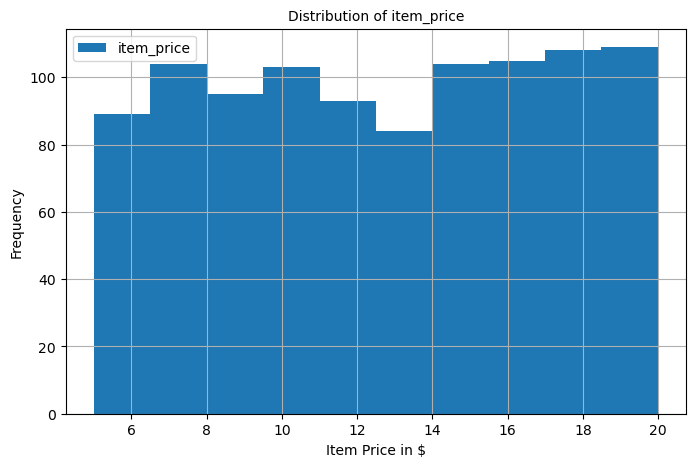

In [363]:
menu_df["item_price"].plot(kind="hist", grid=True, figsize=(8,5))
plt.title("Distribution of item_price", fontsize=10)
plt.xlabel('Item Price in $')
plt.legend()

### Relationship between menu item rating and price

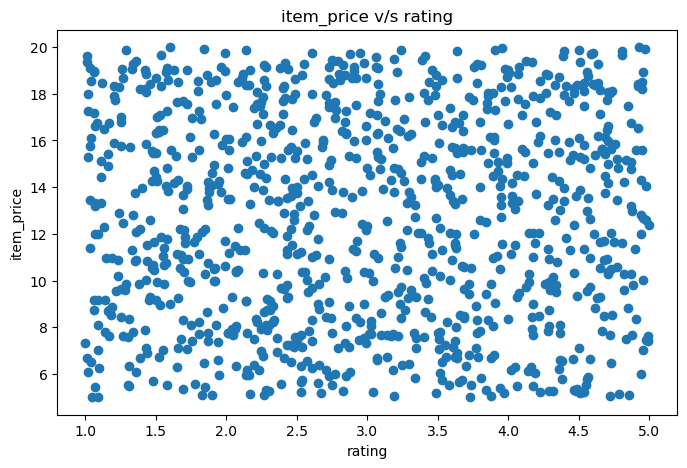

In [279]:
plt.figure(figsize=(8,5))
plt.scatter(x='rating',y='item_price',data=menu_df)
plt.xlabel('rating')
plt.ylabel('item_price')
plt.title('item_price'+' v/s '+ 'rating')
plt.show()

### Average rating of each item_type

In [280]:
menu_df.groupby(by='item_type')['rating'].mean().reset_index(name='avg_rating')

,item_type,avg_rating
0,appetizer,3.009496
1,dessert,2.887634
2,drink,3.048917
3,entree,2.979300


### Top-5 most popular items based on sales_count

In [282]:
items_df=menu_df.groupby(by='item_name')['sales_count'].sum().reset_index()
items_df

,item_name,sales_count
0,beef appetizer,238
1,beef bread appetizer,89
2,beef bread dessert,64
3,beef bread fish chicken appetizer,80
4,beef bread pork rice appetizer,99
...,...,...
711,vegetables tofu beef dessert,2
712,vegetables tofu entree,83
713,vegetables tofu fish entree,94
714,vegetables tofu noodles chicken appetizer,6


In [283]:
top_5_items_df = items_df.sort_values(by='sales_count',ascending=False).head(5).reset_index()
top_5_items_df

,index,item_name,sales_count
0,202,fish appetizer,727
1,87,bread entree,551
2,85,bread dessert,511
3,230,fish entree,505
4,586,tofu drink,495


### Total revenue generated by restaurent in past quarter

In [284]:
menu_df.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item,is_vegetarian
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"[noodles, rice, beef, pork]",727,3.06,8,9.02,0
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"[pork, vegetables, fish, beef]",412,1.69,90,6.02,0
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"[shrimp, bread, rice, noodles]",358,2.89,26,4.44,0
3,4,vegetables beef dessert,delicious dessert,dessert,13.77,"[vegetables, beef]",355,2.50,5,6.59,0
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"[fish, pork, noodles]",117,3.49,22,8.86,0


In [285]:
menu_df['revenue'] = menu_df['item_price']*menu_df['sales_count']

In [286]:
menu_df.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item,is_vegetarian,revenue
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"[noodles, rice, beef, pork]",727,3.06,8,9.02,0,153.20
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"[pork, vegetables, fish, beef]",412,1.69,90,6.02,0,1592.10
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"[shrimp, bread, rice, noodles]",358,2.89,26,4.44,0,485.68
3,4,vegetables beef dessert,delicious dessert,dessert,13.77,"[vegetables, beef]",355,2.50,5,6.59,0,68.85
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"[fish, pork, noodles]",117,3.49,22,8.86,0,413.60


In [364]:
total_revenue = menu_df['revenue'].sum()
print(f'Total revenue in the past quarter is: ${total_revenue}')

Total revenue in the past quarter is: $625215.21


### Checking for items having either price = 0 or sales_count=0

In [288]:
menu_df[menu_df['item_price']==0][['item_name','item_price']]

,item_name,item_price


In [289]:
menu_df[menu_df['sales_count']==0][['item_name','sales_count']]

,item_name,sales_count
130,pork bread shrimp rice dessert,0
183,rice beef dessert,0
212,bread noodles vegetables pork dessert,0
323,tofu shrimp chicken noodles entree,0
641,bread beef vegetables dessert,0
661,shrimp pork chicken rice dessert,0


### Removing the items having sales_count = 0

In [291]:
menu_df = menu_df[~(menu_df['revenue']==0)]

### Gross profit margin for each item

In [293]:
menu_df['gross_profit_margin'] = ((menu_df['revenue']-menu_df['cost_per_item'])/menu_df['revenue'])*100

In [294]:
menu_df.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item,is_vegetarian,revenue,gross_profit_margin
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"[noodles, rice, beef, pork]",727,3.06,8,9.02,0,153.20,94.112272
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"[pork, vegetables, fish, beef]",412,1.69,90,6.02,0,1592.10,99.621883
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"[shrimp, bread, rice, noodles]",358,2.89,26,4.44,0,485.68,99.085818
3,4,vegetables beef dessert,delicious dessert,dessert,13.77,"[vegetables, beef]",355,2.50,5,6.59,0,68.85,90.428468
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"[fish, pork, noodles]",117,3.49,22,8.86,0,413.60,97.857834


In [366]:
menu_df[menu_df['gross_profit_margin']==menu_df['gross_profit_margin'].max()][['item_name','gross_profit_margin']]

,item_name,gross_profit_margin
82,shrimp bread pork entree,99.791025


### Part-3 Summary -
1. The Distribution of menu item price is almost simlar for each price bin having minimum count between 12-14 and maximum between 18-20
2. There is no any recognized relationship between rating and item_price.
3. The best average rated item_type category is drink
4. Top-5 most popular items based on sales_count are - fish appetizer, bread entree, bread dessert, fish entree and tofu drink
5. Total revenue generated by restaurent in past quarter is - $625215.21.

6. Maximum gross profit margin is $99.791025 for the item- shrimp bread pork entree

### Menu items with lowest gross profit margin

In [296]:
menu_df[menu_df['gross_profit_margin']==menu_df['gross_profit_margin'].min()][['item_name','gross_profit_margin']]

,item_name,gross_profit_margin
667,shrimp pork tofu beef appetizer,40.628779


### Other items having lowest margin

In [303]:
low_margin_items = menu_df.sort_values(by='gross_profit_margin')[['item_name','gross_profit_margin']].head(5)

In [304]:
low_margin_items

,item_name,gross_profit_margin
667,shrimp pork tofu beef appetizer,40.628779
855,pork rice chicken tofu drink,47.005829
735,rice tofu appetizer,47.281831
396,beef vegetables shrimp bread entree,50.148368
614,vegetables beef shrimp noodles entree,53.984576


### Ingredients and cost_per_item relationship

In [306]:
new_menu_df.head()

,item_id,item_price,calories,rating,sales_count,cost_per_item,item_name_beef appetizer,item_name_beef bread appetizer,item_name_beef bread dessert,item_name_beef bread fish chicken appetizer,...,beef,bread,chicken,fish,noodles,pork,rice,shrimp,tofu,vegetables
0,1,19.15,727,3.06,8,9.02,0,0,0,0,...,1,0,0,0,1,1,1,0,0,0
1,2,17.69,412,1.69,90,6.02,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,3,18.68,358,2.89,26,4.44,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
3,4,13.77,355,2.50,5,6.59,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,18.80,117,3.49,22,8.86,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


### Average cost_per_item for all items

In [317]:
Avg_cost = new_menu_df['cost_per_item'].mean()
Avg_cost

5.145419999999999

In [350]:
Veg_avg_cost = menu_df[menu_df['is_vegetarian']==1]['cost_per_item'].mean()
Veg_avg_cost

5.3366197183098585

In [351]:
Non_veg_avg_cost = menu_df[menu_df['is_vegetarian']==0]['cost_per_item'].mean()
Non_veg_avg_cost

5.096248399487835

### The average cost of items which is vegeterian is having higher cost compared to items which is non-veg.

### Since the amount and price of each ingredient along with quantity size of items is unknown, It is hard to understand cost saving measures based on ingredients.
### But we can try to see the differnce of average of cost_per_item in the presence and absence of an ingredient to get some insights.

In [352]:
Avg_cost_without_beef = new_menu_df[(new_menu_df['beef']==0)]['cost_per_item'].mean()
Avg_cost_without_beef

5.125458221024258

In [353]:
Avg_cost_without_beef = new_menu_df[(new_menu_df['beef']==1)]['cost_per_item'].mean()
Avg_cost_without_beef

5.20282945736434

#### Having beef as an ingredient in the item results in the increase of average of cost_per_item, which means we need to cut some quantity of beef in the ingredient and we can try to get a supplier which can provide beef as less price.

### The items with sales_count = 0 which we have removed , are the items which should be removed from the menu as they are having no sales

### Let's find out more items which should be removed from the menu

In [337]:
menu_df.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item,is_vegetarian,revenue,gross_profit_margin
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"[noodles, rice, beef, pork]",727,3.06,8,9.02,0,153.20,94.112272
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"[pork, vegetables, fish, beef]",412,1.69,90,6.02,0,1592.10,99.621883
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"[shrimp, bread, rice, noodles]",358,2.89,26,4.44,0,485.68,99.085818
3,4,vegetables beef dessert,delicious dessert,dessert,13.77,"[vegetables, beef]",355,2.50,5,6.59,0,68.85,90.428468
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"[fish, pork, noodles]",117,3.49,22,8.86,0,413.60,97.857834


In [373]:
item_df=menu_df.groupby(by='item_name').agg({'sales_count':'sum','gross_profit_margin':'mean'}).reset_index()
item_df

,item_name,sales_count,gross_profit_margin
0,beef appetizer,238,97.420448
1,beef bread appetizer,89,99.742844
2,beef bread dessert,64,99.203745
3,beef bread fish chicken appetizer,80,99.315642
4,beef bread pork rice appetizer,99,99.475456
...,...,...,...
705,vegetables tofu beef dessert,2,74.953789
706,vegetables tofu entree,83,99.703367
707,vegetables tofu fish entree,94,99.720906
708,vegetables tofu noodles chicken appetizer,6,93.389282


In [375]:
items_to_remove = item_df.sort_values(by = ['sales_count','gross_profit_margin'])[['item_name','sales_count','gross_profit_margin']].head(20)
items_to_remove

,item_name,sales_count,gross_profit_margin
532,shrimp pork tofu beef appetizer,1,40.628779
391,pork rice chicken tofu drink,1,47.005829
474,rice tofu appetizer,1,47.281831
66,beef vegetables shrimp bread entree,1,50.148368
632,vegetables beef shrimp noodles entree,1,53.984576
204,fish beef dessert,1,54.628422
242,fish pork chicken entree,1,56.965718
622,tofu vegetables entree,1,63.705972
182,chicken shrimp vegetables dessert,1,71.690821
20,beef fish chicken pork drink,2,71.671196


### The above mentioned items can be removed from menu as they are having least sale_count  along with less gross_profit_margin

### Let's find out some items which should be promoted

In [376]:
items_to_promote = item_df.sort_values(by = ['sales_count'])[['item_name','sales_count','gross_profit_margin']].tail(20)
items_to_promote

,item_name,sales_count,gross_profit_margin
582,tofu entree,303,97.787644
507,shrimp dessert,335,94.382936
442,rice drink,341,98.075344
580,tofu dessert,352,96.594180
563,tofu appetizer,365,98.386158
152,chicken dessert,369,98.682500
624,vegetables appetizer,373,98.799895
226,fish dessert,380,98.330004
441,rice dessert,385,99.348033
17,beef entree,392,98.637352


### The above mentioned items can be promoted from menu as they are having most sale_count along with high gross_profit_margin

### Part-4 - Summary:
1. Menu items with lowest gross profit margins are - shrimp pork tofu beef appetizer, pork rice chicken tofu drink, rice tofu appetizer, beef vegetables shrimp bread entree, vegetables beef shrimp noodles entree.
2. The average cost of items which is vegeterian is having higher cost compared to items which is non-veg.
3. Having beef as an ingredient in the item results in the increase of average of cost_per_item, which means we need to cut some quantity of beef in the ingredient and we can try to get a supplier which can provide beef as less price.
4. Based on the sales_count and gross profit margin, some of the items from the menu can be removed and some can be promoted.

## Plan for optimizing the menu to maximize revenue

1. Remove the items from the menu having low sales count and low gross profit margin
2. Promote the items having a high sales count and increase the item price to get more gross profit margin.
3. Decrease the item_price for the items having good rating but have low sales count.
4. Either remove the items or increase the price of items from menu having items with low gross profit margin and having high cost ingredients.
5. Since veg-items have high pricing, remove the veg-items having low popularity.